붖꽃 데이터 셋에 LDA 적용하기

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [5]:
lda = LinearDiscriminantAnalysis(n_components=2)
# PCA 와 다르게 target 값을 꼭 넣어줘야함
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
# lda.fit_transform(iris_scaled, iris.target)
print(iris_lda.shape)

(150, 2)


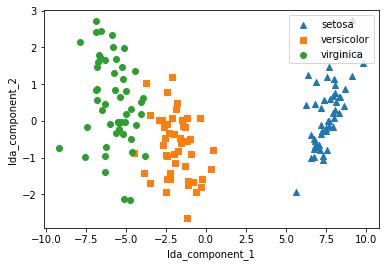

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisdf_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisdf_lda['target'] = iris.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisdf_lda[irisdf_lda['target'] == i]['lda_component_1']
    y_axis_data = irisdf_lda[irisdf_lda['target'] == i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label=iris.target_names[i])
    
plt.legend(loc = 'upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()
    

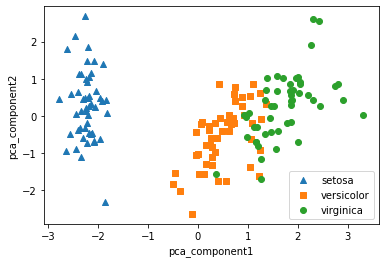

In [10]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target
irisDF.head(3)
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
pca_columns = ['pca_component1', 'pca_component2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target

markes = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data =irisDF_pca[irisDF_pca['target'] == i]['pca_component1']
    y_axis_data =irisDF_pca[irisDF_pca['target'] == i]['pca_component2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])


plt.legend()
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.show()